<a href="https://colab.research.google.com/github/MatchLab-Imperial/deep-learning-course/blob/master/week03_part1_CNN_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks

This tutorial addresses the basic concepts of Convolutional Neural Networks and their implementation in the Keras framework. 

Convolutional neural networks (CNNs) are a class of feed-forward artificial neural networks that are applied to analyze visual 2D imagery. Meaning that we can feed images directly to CNN, without the need for flatting them in a 1D vector.

CNNs have revolutionized the field of computer vision in the last years. It was on 2012 when Alex Krizhevsky introduced AlexNet architecture to win the ImageNet Challenge (one the most important competitions on image classification), by reducing the top-5 error more than 10 percentage points, which was an incredible improvement at that time. As of now, CNNs have been explored not only on image classification but in any other computer vision field. 

![](https://cv-tricks.com/wp-content/uploads/2017/03/xalexnet_small-1.png.pagespeed.ic.u_mv-jhXMI.webp)

The image above is from [cv-tricks' blog](https://cv-tricks.com/cnn/understand-resnet-alexnet-vgg-inception/) and shows the prosed AlexNet arhictecure. It is composed of 5 convolutional layers followed by 3 fully connected layers. Nowadays, we can find much deeper architectures, which outperformed AlexNet on the ImageNet Challenge. 







# CNN Structure

The basic pipeline of a CNN takes an image as input, which goes through a series of layers in order to obtain the final output. The output of the final layer could be a probability vector for classification, a single value for regression or, for instance, another image for semantic segmentation or image transformation purposes. Layers in a CNN are similar to those we have already seen on 1D neural networks, however, the input now is a 2D matrix, while before it was a flat vector. Now, we will introduce some layers that are used in CNNs. 

# 2D Convolutional Layer

The most common layers in CNN architectures are the 2D convolutional layers. Convolutional layers are used to extract features from images. In addition to extracting features from images, when convolutional layers are concatenated, they can extract more complex features based on the previously extracted features. 

![](https://cdn-images-1.medium.com/max/800/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

Latest deep learning frameworks have made possible the integration of convolutional layers easily on our architectures with only a single line of code. However, the operation itself at the beginning could be a bit confusing and it is essential for understanding how a CNN works. Following images and some explanations  from [Irhum Shafkat's blog](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1) and [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/) book. Both strongly recommended.

In order to understand the 2D convolution, we need to define what is a kernel. The kernel is simply a matrix of weights.  This kernel will do an operation similar to a sliding window over the input image, performing an elementwise multiplication with the elements that are currently on. The results of this elementwise multiplication are summed up, giving, as a result, a single output value. This operation is repeated for all the positions of this sliding window, composing at the end the matrix of features. 

> 

![](https://cdn-images-1.medium.com/max/800/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif)

> 
The previous image shows the 2D convolution operation. The features are the weighted sums of the input values within the sliding window. The bigger the size of the kernel is,  the many more feature points will contribute to the final output value. This means the size of the kernel directly determines the number of feature components for estimating the output component. In contrast to fully connected layers, where the output is a weighted sum over the input values, 2D convolutions compute features based on local areas. In other words, instead of looking at every input component, they consider only features coming from close locations. 

In images the input map is 5x5, after the convolution operation, the final map is 3x3. Output size can be computed by doing:

$O = W - K + 1$,

where $O$ is the output height/length, $W$ is the input height/length and $K$ is the kernel size. Therefore, the output size is not only conditioned to the input size but also to the kernel size.









In [27]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 1))

# input: 100x100 image with 1 channels -> (100, 100, 1) tensor.
# this applies 1 convolution filter of size 3x3 each.
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(100, 100, 1)))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:})'.format(input_feature.shape[1], input_feature.shape[2]))
print('Output size: ({:}, {:})'.format(output_feature.shape[1], output_feature.shape[2]))

Input size: (100, 100)
Output size: (98, 98)


Moreover, the final size can be also affected by two techniques: padding and striding.

# Adding Padding to Input Features

Sometimes we need the output size to be equal to the input size. Padding offers the solution to that, it adds extra edges with virtual pixel values to the input features. Normally those pixes have 0 value (termed zero-padding), but depending on the application other methods could be used, e.g., reflection or symmetric padding.

![](https://cdn-images-1.medium.com/max/800/1*1okwhewf5KCtIPaFib4XaA.gif)

The new output size can be computed by doing:

$O = W - K + 2P+ 1$, 

where  $P$ is the padding value.

In [28]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 1))

# input: 100x100 image with 1 channels -> (100, 100, 1) tensor.
# this applies 1 convolution filter of size 3x3 each.
# This applies zero-padding
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(100, 100, 1), padding='same'))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:})'.format(input_feature.shape[1], input_feature.shape[2]))
print('Output size: ({:}, {:})'.format(output_feature.shape[1], output_feature.shape[2]))

Input size: (100, 100)
Output size: (100, 100)


# Using Stride in Convolutional Layers

Stride operation allows the convolutional layers to skip some of the sliding windows explained above, instead of jumping one pixel apart, we can define the number of jumps before computing the weighting sum operation. A stride of 1 means to pick windows a pixel apart, so basically every single window, acting as a standard convolution. A stride of 2 means picking windows 2 pixels apart, skipping every other window in the process. Therefore, strides reduce the size of the output map. Sometimes, we do not want to have the same output size as the input. In practice, as deeper we go through the CNN, the size of the feature map gets smaller while the number of channels increases.

![](https://cdn-images-1.medium.com/max/800/1*BMngs93_rm2_BpJFH2mS0Q.gif)

The new output size can be computed by doing:

$O = \dfrac{W - K + 2P}{S}+ 1$, 

where  $S$ is the stride value.

In [29]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 1))

# input: 100x100 image with 1 channels -> (100, 100, 1) tensor.
# this applies 1 convolution filter of size 3x3 each.
# This applies zero-padding
# This applies stride of 2
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(100, 100, 1), padding='same', strides=2))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:})'.format(input_feature.shape[1], input_feature.shape[2]))
print('Output size: ({:}, {:})'.format(output_feature.shape[1], output_feature.shape[2]))

Input size: (100, 100)
Output size: (50, 50)


# Differences Between Kernel and Filters

Examples above take an input with a single channel and compute a feature map with also one channel. However, when dealing with real images, they normally have 3 channels, RGB channels, therefore, when doing the 2D convolution we will need to define 3 kernels to interact with each of the image dimensions. This group of kernels is called filter. Thus, a filter is a collection of kernels and produces a single output.

When going deeper in CNN, we use several filters in each layer, being the number of filters the same number of channels in the feature map. In addition, each filter MUST have the same number of kernels than the number of channel of the input feature. Keras already deals with the number of kernels inside each filter. Thus, we only must decide the number of filters (output channels) in each layer.

Next figure shows how the convolution is performed when having three input channels. First, one filter uses its three independent kernels to convolve with the RBG channels of the input image:

![](https://cdn-images-1.medium.com/max/1000/1*8dx6nxpUh2JqvYWPadTwMQ.gif)

Then, each of the processed feature maps is summed together to obtain a single channel. Each of the kernels of the filter produces one single map for each channel.

![](https://cdn-images-1.medium.com/max/1000/1*CYB2dyR3EhFs1xNLK8ewiA.gif)

Finally, we add the bias term to obtain the final feature map. There is a single bias, therefore the bias gets added to the output channel so far to produce the final output channel. This operation is repeated for all filters on its own since each filter has a different set of kernels and a scalar bias. 






In [30]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 3))

# input: 100x100 image with 3 channels -> (100, 100, 3) tensor.
# this applies 32 convolution filters of size 3x3 each.
# This applies zero-padding
# This applies stride of 2
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), padding='same', strides=2))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:}, {:})'.format(input_feature.shape[1], input_feature.shape[2], input_feature.shape[3]))
print('Output size: ({:}, {:}, {:})'.format(output_feature.shape[1], output_feature.shape[2], output_feature.shape[3]))

Input size: (100, 100, 3)
Output size: (50, 50, 32)


# Activation Functions

As seen in previous tutorials, after convolutional layers usually we can find activation functions. Those activation functions are a set of function that will map the feature values to a new set of resulting values, depending on the function at hand. 

In addition to mapping the values from one domain to another, they also can add non-linearities to the network by applying non-linear activation functions. 


The complete list of activation functions that Keras offers can be found [here](https://keras.io/activations/). We introduce here how some of them look:

*  **Sigmoid Function** sets the output in the range (0, 1). The sigmoid function is widely used in classification problems since its output can be taken as a probability value. $keras.activations.sigmoid(x)$:

>![](https://i.ibb.co/Ph8dsTv/sigmoid.png)

*  **Tanh Function** is a logistic function as sigmoid, but the range of the tanh function is (-1, 1). Contrary to sigmoid function, where the values close to 0 are set around 0.5, in the tanh function they will be still mapped around the 0 value. $keras.activations.tanh(x)$:
![](https://i.ibb.co/68g7LpL/tanh.png)

*  **ReLU Function** is the most common activation function you can find in any CNN. The range of this function in \[0, inf). Basically, it sets all negative values to 0. $keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)$:
![](https://i.ibb.co/Zd9H8Z4/relu.png)

*  **LeakyReLU Function** is a new version of the ReLU activation above. While ReLU does not backpropagate negative values, Leaky ReLU smooths those values without setting them to 0. That allows the gradients to backpropagate through the network. $keras.layers.LeakyReLU(alpha=0.3)$:
![](https://i.ibb.co/dmnJ6h1/leakyrelu.png)

*  **Softmax Function** is another widely activation function for multi-class classification problems. This function therefore sets the output to the range (0, 1). However, softmax function not take independently the input values to map in their probability values, it takes an un-normalized vector, $s$, and normalizes it into a probability distribution, $p$. $keras.activations.softmax(x, axis=-1)$. The output value $p_i$ is computed as:

> $p_{i} = \dfrac{e^{s_i}}{\sum_{\substack{j}}^{N} e^{s_j}}$





Following example shows the feature maps before and after of the ReLU activation function. All values that are negative are set to 0 after the activation function as explained above. 

In [31]:
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, Activation

# Generate dummy data
input_feature = np.random.random((1, 3, 3, 1)) - 0.5

# input: 3x3 image with 1 channel -> (3, 3, 1) tensor.
# This applies a 1 convolution filter of size 3x3 each.
# This applies a ReLU activation function
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(3, 3, 1), padding='same', strides=1, name='conv'))
model.add(Activation('relu'))

model_before_ReLU = Model(inputs=model.input, outputs=model.get_layer('conv').output)

output_feature = model_before_ReLU.predict(input_feature)
output_ReLu_feature = model.predict(input_feature)

print('Output Network without activation function')
print(output_feature)

print('')
print('Output Network after ReLU activation function')
print(output_ReLu_feature)


Output Network without activation function
[[[[ 0.00148514]
   [-0.01708015]
   [ 0.04236434]]

  [[ 0.00948405]
   [-0.14155501]
   [ 0.2395722 ]]

  [[ 0.04504727]
   [-0.03786305]
   [ 0.06754634]]]]

Output Network after ReLU activation function
[[[[0.00148514]
   [0.        ]
   [0.04236434]]

  [[0.00948405]
   [0.        ]
   [0.2395722 ]]

  [[0.04504727]
   [0.        ]
   [0.06754634]]]]


# Pooling Layer

It is a common practice to insert a Pooling layer between convolutional layers in CNN. As mentioned, feature sizes grow smaller progressively in order to reduce the number of parameters and the computation in the networks. To do so, as convolutional layers, pooling layers perform a spatial sliding window and applies an operation to reduce the spatial size. Those operations vary depending on the architecture, being the max, mean and min pooling the most typical ones. Here, we will explain the max pooling, although all the others work in a similar way. Max pooling keeps only the max value in a neighbohood, where the neighhood is defined by the size of the kernel. Next example shows the result of a Max Pooling layer with a 2x2 kernel and a stride of 2.

![](https://i.ibb.co/Xp454S4/MaxPool.png)

As in convolutional layers, the final size is conditioned to the stride size. However, contrary to convolutional layers, pooling layers operate independently on each of the input channels, without modifying the depth of the feature maps. 

In [32]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 3))

# input: 100x100 image with 3 channels -> (100, 100, 3) tensor.
# this applies 32 convolution filters of size 3x3 each.
# This applies zero-padding
# This applies maxPooling of 2
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), padding='same', strides=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:}, {:})'.format(input_feature.shape[1], input_feature.shape[2], input_feature.shape[3]))
print('Output size: ({:}, {:}, {:})'.format(output_feature.shape[1], output_feature.shape[2], output_feature.shape[3]))

Input size: (100, 100, 3)
Output size: (50, 50, 32)


#HANDS-ON 

At this point, we already know what are CNNs, how they work and their components in order to design them. 

We want you to design a CNN able to outperform a 1D neural network. We will use CIFAR10, so try to repeat the experiment but with a CNN and outperform the 1D NN:

Let's now load the dataset and visualize some data examples:

Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of test samples: 10000


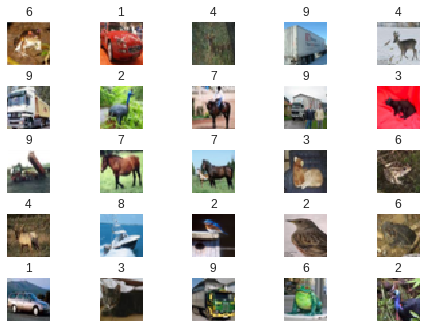

In [33]:
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import rmsprop

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(X_train.shape[1:]))
print('Total number of training samples: {0}'.format(X_train.shape[0]))
print('Total number of test samples: {0}'.format(X_test.shape[0]))

# Let's visualize some examples
N=5
start_val = 0 # pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
items = list(range(0, 10))
for row in range(N):
  for col in range(N):
    idx = start_val+row+N*col
    axes[row,col].imshow(X_train[idx], cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    y_target = int(y_train[idx])
    target = str(items[y_target])
    axes[row,col].set_title(target)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])

We need to preprocess the dataset images for our 1D neural network:

In [34]:
# Preprocess dataset for a 1D neural network

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

X_train_flatten = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]*3)
X_test_flatten = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]*3)

print('New X_train shape: {0}'.format(X_train_flatten.shape))

Y_train_class = np_utils.to_categorical(y_train, 10)
Y_test_class = np_utils.to_categorical(y_test, 10)

print('New Y_train shape: {0}'.format(Y_train_class.shape))


New X_train shape: (50000, 3072)
New Y_train shape: (50000, 10)


Now, we are ready to define our model and train it.

In [35]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_flatten.shape[1:])))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

# initiate RMSprop optimizer
opt = rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=10)

score = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                98336     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               33024     
__________

Define here your CNN architecture. You can try different combinations of 2D convolutional layers,  data augmentation, batch normalization, dropout, activation functions... and see how far you can get! 

In [36]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
print(X_train.shape[1:])
# . . .

print('Define here your architecture')

# . . .
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

(32, 32, 3)
Define here your architecture
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                327690    
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


We leave the result of a CNN only trained 3 epocs that already outperforms the previous 1D neural network.

In [37]:
# initiate RMSprop optimizer
opt = rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(X_train, Y_train_class, batch_size=32, epochs=3)

score = model.evaluate(X_test, Y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/3
50000/50000 [==============================] - 54s 1ms/step - loss: 1.8396 - acc: 0.3550
Epoch 2/3
50000/50000 [==============================] - 54s 1ms/step - loss: 1.7205 - acc: 0.4099
Epoch 3/3
50000/50000 [==============================] - 54s 1ms/step - loss: 1.6907 - acc: 0.4251
Test loss: 1.712019095993042
Test accuracy: 0.4123
